# Part 1: Data Discovery & Exploration

Welcome! In this notebook, i’ll take the first step of understanding the data and explore the datasets to understand the data flow, uncover insights, and tell the story behind the numbers.

We have inherited **four datasets**:

1. `campaign_leads` – information about leads generated from campaigns.
2. `campaigns` – metadata about the campaigns themselves.
3. `insights` – performance metrics from campaigns.
4. `lead_status_changes` – tracking how leads progress through statuses.

## What we'll do:

- **Inspect the structure** of each dataset: columns, types, missing values.
- **Identify issues**: data type inconsistencies, invalid or suspicious values, missing information.
- **Discover patterns and anomalies** that could influence downstream analysis.
- **Ask key questions** that would help clarify ambiguities with stakeholders.
- **Document findings** in a clear manner way.

> Think of this notebook as a detective story: each dataset is a clue, and my job is to piece together the story before taking action.

By the end of this exploration, we'll have a **solid understanding of the data**, the **quality and reliability** of each dataset, and a **roadmap for analysis and modeling**.


In [1]:
import pandas as pd

# Load datasets
campaign_leads = pd.read_csv("campaign_leads.csv")
campaigns = pd.read_csv("campaigns.csv")
insights = pd.read_csv("insights.csv")
lead_status_changes = pd.read_csv("lead_status_changes.csv")

In [2]:
# Quick look
campaign_leads.head()

,id,campaign_id,name,email,phone,lead_status,added_date
0,77930,6496,Vicky Mohr Sr.,smith.oren@example.org,+2015628437879,UNKNOWN,2024-06-01 17:00:40
1,77942,6496,Clovis Mueller,toy.korey@example.net,+1-615-909-5723,UNKNOWN,2024-06-01 18:22:00
2,77964,6493,Austin Ondricka II,hveum@example.org,+2014034035897,NOT_QUALIFIED,2024-06-01 21:56:33
3,77983,6500,Jaquan Kuhn,greenholt.elsa@example.com,310-242-6257,UNKNOWN,2024-06-02 01:13:19
4,77988,6496,Prof. Grayson Collier,obie83@example.com,+2016402961934,UNKNOWN,2024-06-02 01:41:56


In [3]:
campaigns.head()

,id,daily_budget,start_time,stop_time,user_id,project_name
0,4869,1200,2024-10-14 19:41:40,2024-10-16 23:59:59,203,New Capital- General
1,6492,1200,2024-06-01 01:40:49,2024-06-03 23:59:59,762,Dejoya Residence
2,6493,1200,2024-06-01 07:58:51,2024-06-03 23:59:59,466,Azha North Coast Ras El Hekma
3,6495,1200,2024-06-01 15:34:25,2024-06-03 23:59:59,190,Mar Bay - Al Marasem Ras El Hekma
4,6496,2000,2024-06-01 16:18:34,2024-06-04 23:59:59,318,Il Cazar Safia north coast


In [4]:
insights.head()

,ad_set_id,campaign_id,reach,spend,clicks,impressions,created_at
0,16588,6493,848,164.62,77,1015,2024-06-01 00:00:00
1,16588,6493,697,76.82,43,764,2024-06-02 00:00:00
2,16589,6493,643,117.27,50,766,2024-06-01 00:00:00
3,16589,6493,668,58.01,49,736,2024-06-02 00:00:00
4,16590,6493,1345,163.26,117,1567,2024-06-01 00:00:00


In [5]:
lead_status_changes.head()

,lead_id,status,created_at
0,78536,NEW_LEAD,2024-06-06 04:49:55
1,78536,QUALIFIED,2024-12-17 14:47:20
2,78555,NEW_LEAD,2024-06-06 07:58:03
3,78555,QUALIFIED,2024-12-17 14:47:19
4,78571,NEW_LEAD,2024-06-06 10:21:49


In [6]:
#inspect the datasets
for df, name in zip([campaign_leads, campaigns, insights, lead_status_changes],
                    ["campaign_leads", "campaigns", "insights", "lead_status_changes"]):
    print(f"Dataset: {name}")
    print(df.shape)
    print(df.info())
    print(df.isnull().sum())
    print("-"*50)


Dataset: campaign_leads
(56965, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56965 entries, 0 to 56964
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           56965 non-null  int64 
 1   campaign_id  56965 non-null  int64 
 2   name         56965 non-null  object
 3   email        56965 non-null  object
 4   phone        56965 non-null  object
 5   lead_status  56965 non-null  object
 6   added_date   56965 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.0+ MB
None
id             0
campaign_id    0
name           0
email          0
phone          0
lead_status    0
added_date     0
dtype: int64
--------------------------------------------------
Dataset: campaigns
(7364, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7364 entries, 0 to 7363
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7364 non-nul


## >> Identify issues (findings)

###### ~ After examining the datasets, here’s what i found:


### 1️ campaign_leads
- `added_date` is object >>> should be `datetime`.
- `phone` is object, some values may be invalid (like negative numbers, scientific notation like 2.01563E+12).
- Everything else looks okay (no missing values).

### 2️ campaigns
- `start_time` and `stop_time` are object >>> should be `datetime`.
- `daily_budget` is int, fine.
- No missing values. Looks good.

### 3️ insights
- `created_at` is object >>> should be `datetime`.
- `spend` is float, good.
- All numeric fields look okay.
- No missing values. Looks good.

### 4️ lead_status_changes
- `created_at` is object >>> should be `datetime`.
- `status` looks fine.
- `lead_id` is fine.

> So, let's clean it and make it ready to use!



In [7]:
# Convert date columns
campaign_leads['added_date'] = pd.to_datetime(campaign_leads['added_date'], errors='coerce')
campaigns['start_time'] = pd.to_datetime(campaigns['start_time'], errors='coerce')
campaigns['stop_time'] = pd.to_datetime(campaigns['stop_time'], errors='coerce')
insights['created_at'] = pd.to_datetime(insights['created_at'], errors='coerce')
lead_status_changes['created_at'] = pd.to_datetime(lead_status_changes['created_at'], errors='coerce')

# Check conversion
campaign_leads['added_date'].head()


0   2024-06-01 17:00:40
1   2024-06-01 18:22:00
2   2024-06-01 21:56:33
3   2024-06-02 01:13:19
4   2024-06-02 01:41:56
Name: added_date, dtype: datetime64[ns]

In [8]:
# Clean phone numbers

import re
import numpy as np

def clean_phone(phone):
    phone = str(phone)
    # Keep only digits
    digits = re.sub(r'\D', '', phone)
    # If no digits, return NaN
    return digits if len(digits) > 5 else np.nan  # assuming valid phone has at least 6 digits

campaign_leads['phone'] = campaign_leads['phone'].apply(clean_phone)
campaign_leads['phone'].head()


0    2015628437879
1      16159095723
2    2014034035897
3       3102426257
4    2016402961934
Name: phone, dtype: object

In [9]:
# Quick check for invalid dates

# Any nulls after conversion?
print("campaign_leads added_date nulls:", campaign_leads['added_date'].isnull().sum())
print("campaigns start_time nulls:", campaigns['start_time'].isnull().sum())
print("campaigns stop_time nulls:", campaigns['stop_time'].isnull().sum())
print("insights created_at nulls:", insights['created_at'].isnull().sum())
print("lead_status_changes created_at nulls:", lead_status_changes['created_at'].isnull().sum())


campaign_leads added_date nulls: 0
campaigns start_time nulls: 0
campaigns stop_time nulls: 0
insights created_at nulls: 0
lead_status_changes created_at nulls: 0


In [10]:
# check duplicates

print("campaign_leads duplicates:", campaign_leads.duplicated().sum())
print("campaigns duplicates:", campaigns.duplicated().sum())
print("insights duplicates:", insights.duplicated().sum())
print("lead_status_changes duplicates:", lead_status_changes.duplicated().sum())


campaign_leads duplicates: 0
campaigns duplicates: 0
insights duplicates: 16
lead_status_changes duplicates: 1


In [11]:
# Drop duplicates
insights = insights.drop_duplicates()
lead_status_changes = lead_status_changes.drop_duplicates()

# Verify after dropping
print("insights duplicates after drop:", insights.duplicated().sum())
print("lead_status_changes duplicates after drop:", lead_status_changes.duplicated().sum())


insights duplicates after drop: 0
lead_status_changes duplicates after drop: 0


In [12]:
# Add more quality checks
# Check for suspicious values
print("Suspicious daily_budget values:")
print(campaigns[campaigns['daily_budget'] > 100000])  # Extremely high budgets

# Check for data consistency between tables
# Are all campaign_ids in campaign_leads present in campaigns?
missing_campaigns = set(campaign_leads['campaign_id']) - set(campaigns['id'])
print(f"Campaigns in leads but not in campaigns metadata: {len(missing_campaigns)}")

# Check for leads without status changes
leads_without_changes = set(campaign_leads['id']) - set(lead_status_changes['lead_id'])
print(f"Leads without status changes: {len(leads_without_changes)}")

Suspicious daily_budget values:
Empty DataFrame
Columns: [id, daily_budget, start_time, stop_time, user_id, project_name]
Index: []
Campaigns in leads but not in campaigns metadata: 0
Leads without status changes: 30686


###                                > Now we cleaned the dataset, let's Explore and Discover

In [13]:
# let's explore 
# Summary Statistics

# Numeric summary
print(campaign_leads.describe())
print(campaigns.describe())
print(insights.describe())
print(lead_status_changes.describe())

# Categorical summary
print(campaign_leads['lead_status'].value_counts())
print(campaigns['project_name'].value_counts())
print(lead_status_changes['status'].value_counts())


                  id   campaign_id                     added_date
count   56965.000000  56965.000000                          56965
mean   118651.764066  10577.774616  2024-09-19 16:24:26.570121984
min     77930.000000   6493.000000            2024-06-01 17:00:40
25%    100319.000000   8466.000000            2024-07-31 15:40:09
50%    119661.000000  10044.000000            2024-09-15 21:12:42
75%    135552.000000  12604.000000            2024-10-24 22:22:31
max    289259.000000  15249.000000            2025-10-09 23:50:53
std     23663.773985   2448.033408                            NaN
                 id   daily_budget                     start_time  \
count   7364.000000    7364.000000                           7364   
mean   10929.202607    1689.488729  2024-09-11 22:49:30.904399616   
min     4869.000000    1200.000000            2024-06-01 01:40:49   
25%     8714.750000    1200.000000  2024-07-28 20:31:15.249999872   
50%    10989.500000    1200.000000     2024-09-17 12:37:49.50

In [14]:
# Understand the time coverage of campaigns, leads, and insights.
print("campaign_leads date range:", campaign_leads['added_date'].min(), "to", campaign_leads['added_date'].max())
print("campaigns date range:", campaigns['start_time'].min(), "to", campaigns['stop_time'].max())
print("insights date range:", insights['created_at'].min(), "to", insights['created_at'].max())
print("lead_status_changes date range:", lead_status_changes['created_at'].min(), "to", lead_status_changes['created_at'].max())


campaign_leads date range: 2024-06-01 17:00:40 to 2025-10-09 23:50:53
campaigns date range: 2024-06-01 01:40:49 to 2025-10-07 23:59:59
insights date range: 2024-06-01 00:00:00 to 2025-10-28 00:00:00
lead_status_changes date range: 2024-06-06 04:49:55 to 2025-10-14 17:25:24


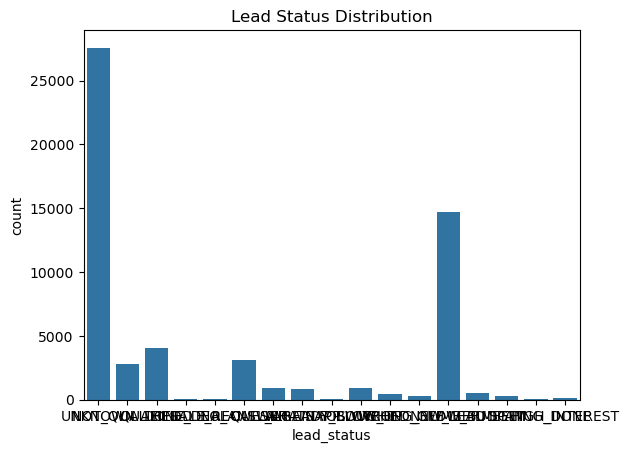

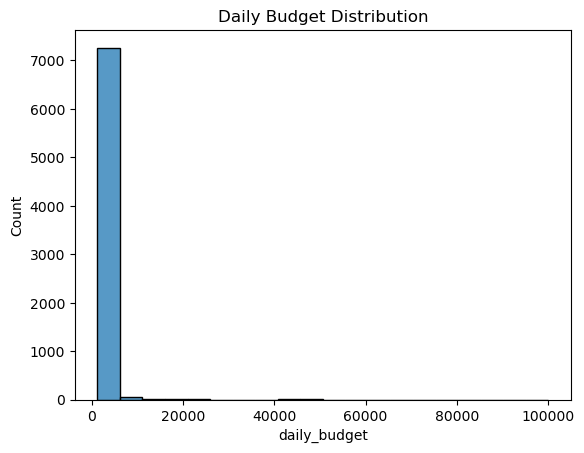

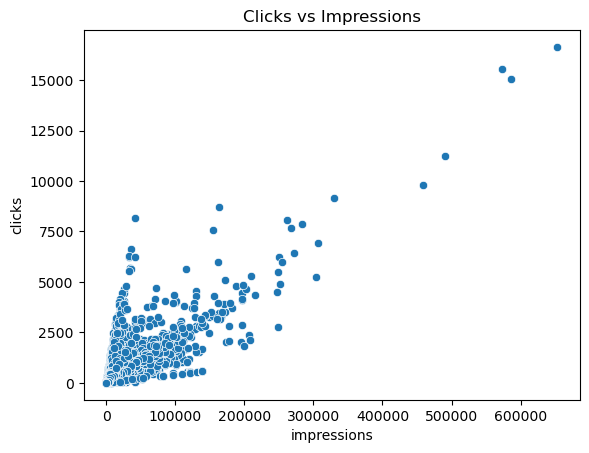

In [15]:
# Look at distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Lead status distribution
sns.countplot(data=campaign_leads, x='lead_status')
plt.title("Lead Status Distribution")
plt.show()

# Campaign budgets
sns.histplot(campaigns['daily_budget'], bins=20)
plt.title("Daily Budget Distribution")
plt.show()

# Insights: clicks vs impressions
sns.scatterplot(data=insights, x='impressions', y='clicks')
plt.title("Clicks vs Impressions")
plt.show()




In [16]:
# Leads per campaign
leads_per_campaign = campaign_leads.groupby('campaign_id').size()
print(leads_per_campaign.describe())

# Average spend and clicks per campaign
campaign_perf = insights.groupby('campaign_id').agg({'spend':'sum', 'clicks':'sum', 'impressions':'sum'})
print(campaign_perf.head())


count    4022.000000
mean       14.163352
std        41.817321
min         1.000000
25%         1.000000
50%         2.000000
75%        10.000000
max      1097.000000
dtype: float64
               spend  clicks  impressions
campaign_id                              
6493          689.19     418         6270
6496         2137.86     156         8019
6497          888.43     125         8091
6499          354.40      11          713
6500          842.40      62         1086


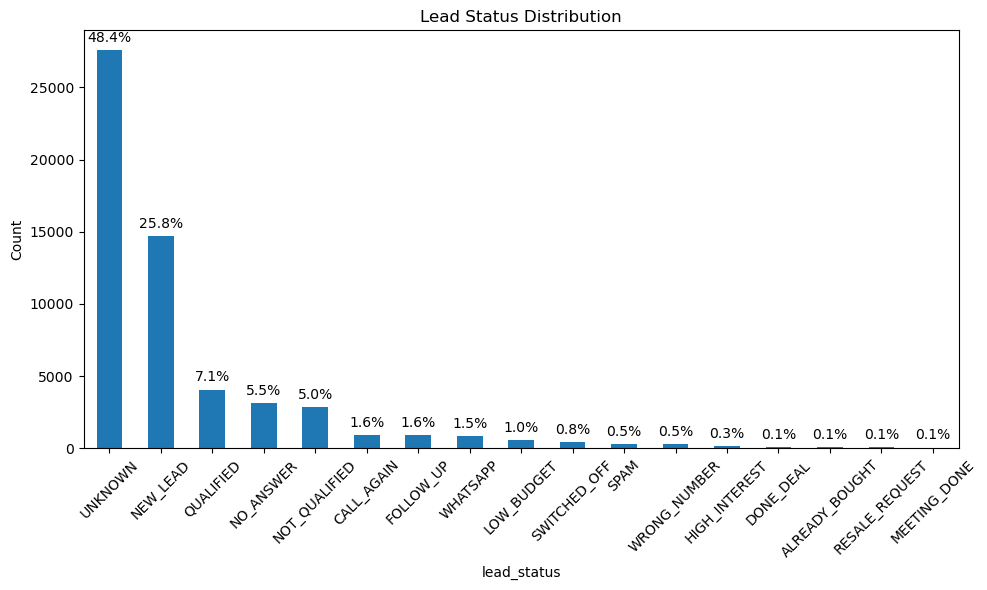

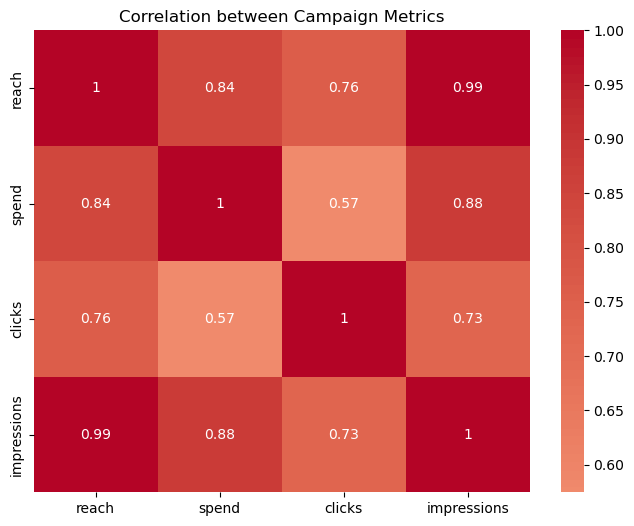

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of lead statuses with percentages
lead_status_counts = campaign_leads['lead_status'].value_counts()
plt.figure(figsize=(10, 6))
ax = lead_status_counts.plot(kind='bar')
plt.title('Lead Status Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Add percentages on bars
total = lead_status_counts.sum()
for i, v in enumerate(lead_status_counts):
    ax.text(i, v + total*0.01, f'{v/total*100:.1f}%', ha='center')
plt.tight_layout()
plt.show()

# Correlation heatmap for insights
plt.figure(figsize=(8, 6))
sns.heatmap(insights[['reach', 'spend', 'clicks', 'impressions']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Campaign Metrics')
plt.show()

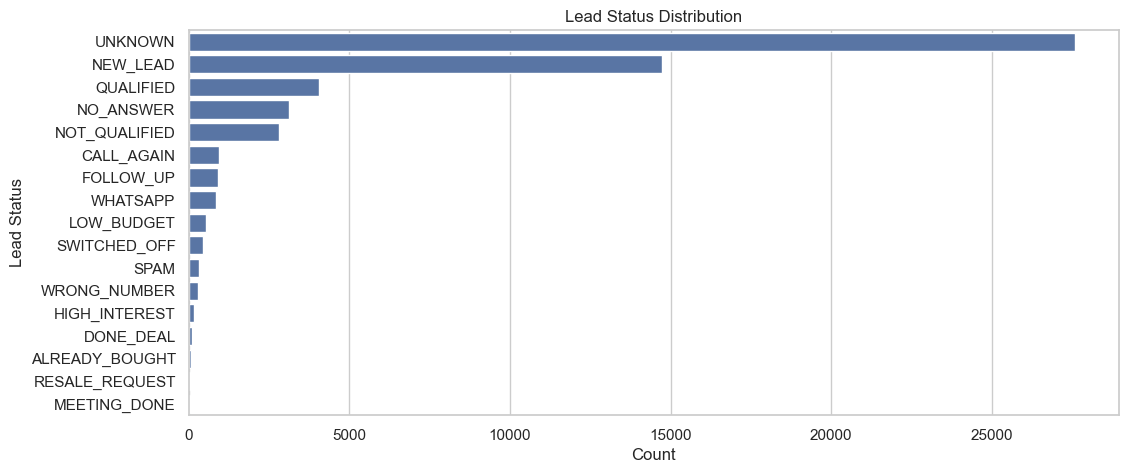

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Lead Status Distribution

plt.figure(figsize=(12,5))
sns.countplot(y='lead_status', data=campaign_leads, order=campaign_leads['lead_status'].value_counts().index)
plt.title("Lead Status Distribution")
plt.xlabel("Count")
plt.ylabel("Lead Status")
plt.show()


##### * Insight : Most leads are UNKNOWN or NEW_LEAD. Only a small fraction are QUALIFIED or DONE_DEAL. This indicates that filtering by lead_status may be important when calculating campaign performance... the exact number : Leads without status changes: 30686 (in check cell above)

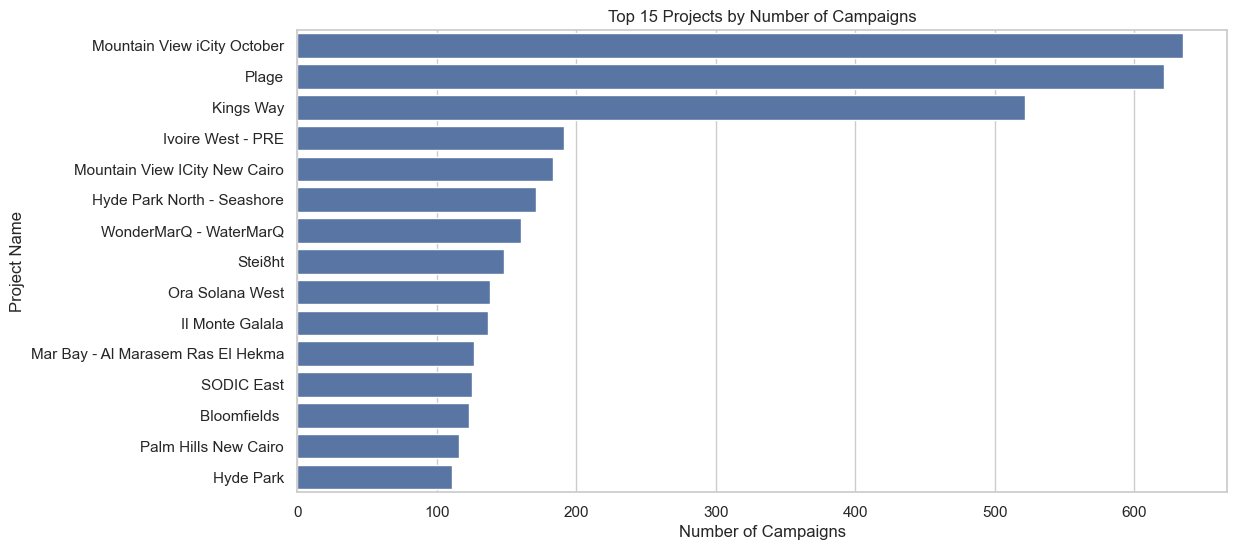

In [19]:

# 2. Campaign Project Counts

plt.figure(figsize=(12,6))
top_projects = campaigns['project_name'].value_counts().head(15)
sns.barplot(x=top_projects.values, y=top_projects.index)
plt.title("Top 15 Projects by Number of Campaigns")
plt.xlabel("Number of Campaigns")
plt.ylabel("Project Name")
plt.show()


##### * Insight : Some projects have many campaigns (e.g., “Mountain View iCity”), while many projects have only 1 campaign. This might affect aggregated performance metrics if analyzed at project level.

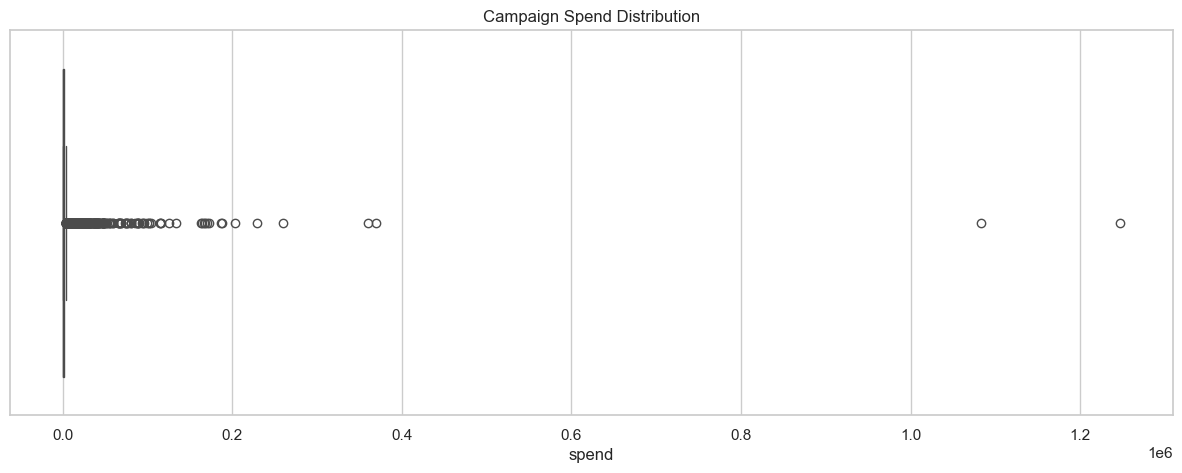

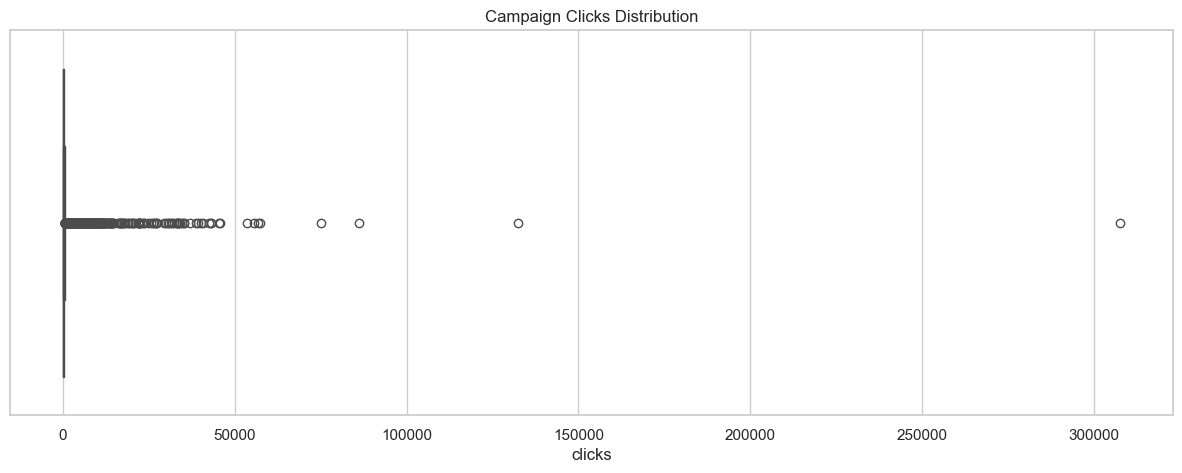

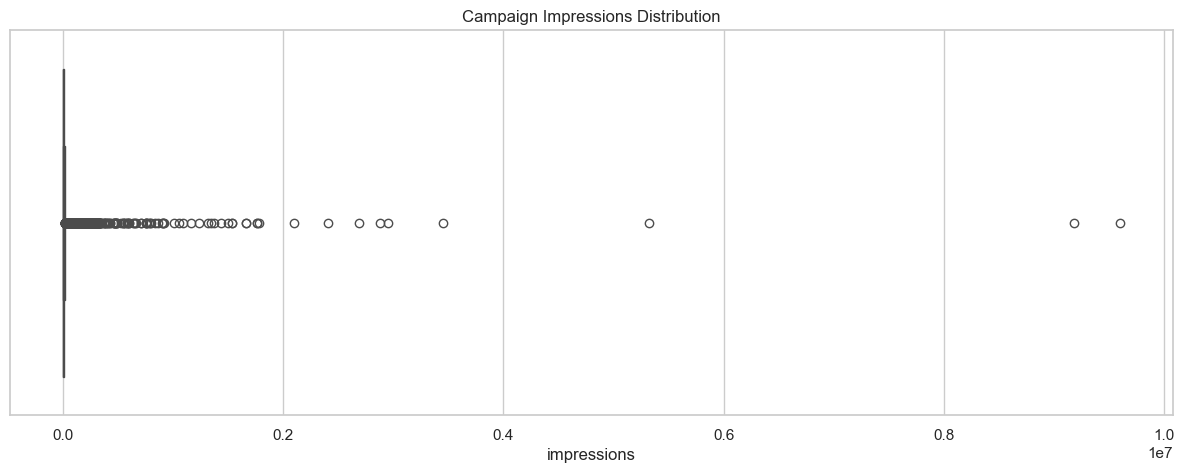

In [20]:
# 3. Campaign Performance Boxplots

plt.figure(figsize=(15,5))
sns.boxplot(x=campaign_perf['spend'])
plt.title("Campaign Spend Distribution")
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=campaign_perf['clicks'])
plt.title("Campaign Clicks Distribution")
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=campaign_perf['impressions'])
plt.title("Campaign Impressions Distribution")
plt.show()


##### * Insight : Campaign metrics are heavily right-skewed. A few campaigns account for very high spend, clicks, or impressions. This suggests outliers should be considered when analyzing performance.

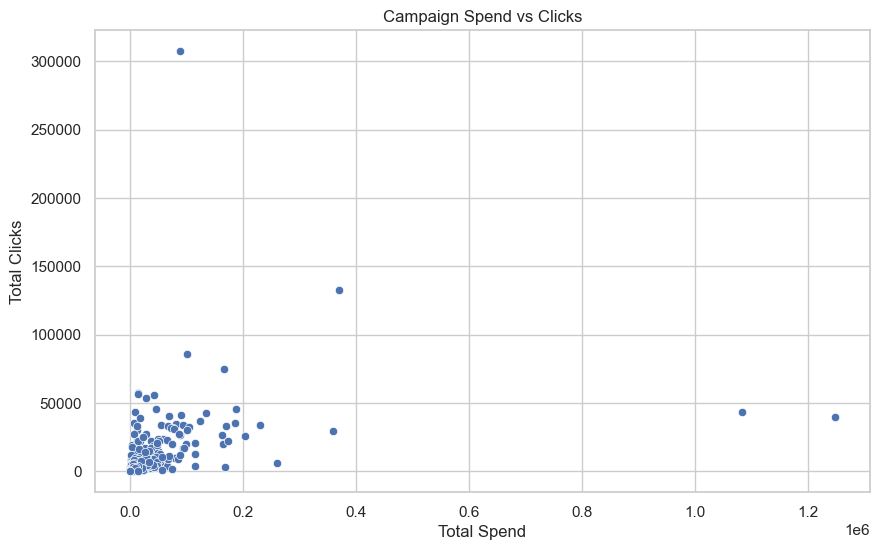

In [21]:
# 4. Spend vs Clicks Scatter Plot

plt.figure(figsize=(10,6))
sns.scatterplot(data=campaign_perf, x='spend', y='clicks')
plt.title("Campaign Spend vs Clicks")
plt.xlabel("Total Spend")
plt.ylabel("Total Clicks")
plt.show()


##### * Insight : There is a general positive trend between spend and clicks, but some campaigns have high spend but very few clicks, which may indicate inefficiency.

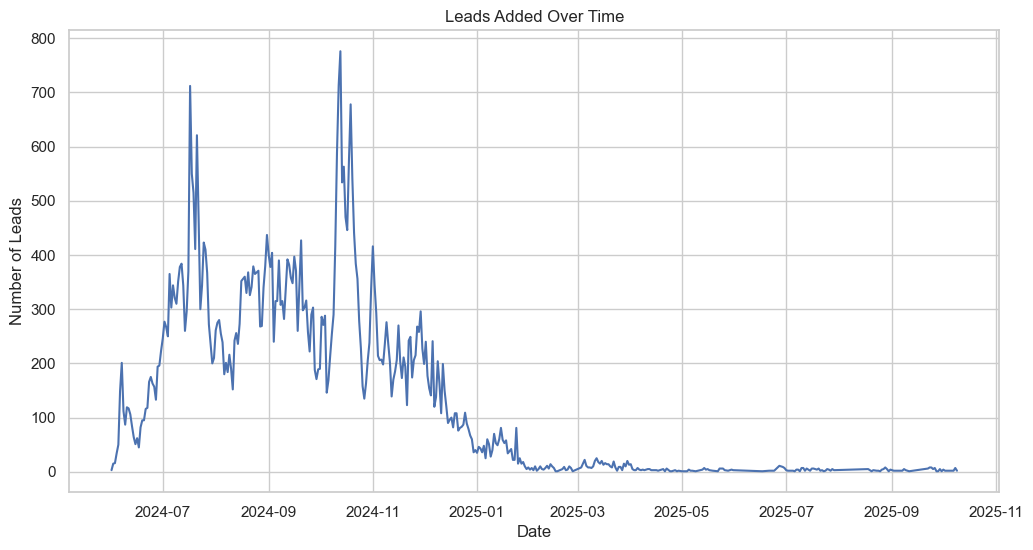

In [22]:
# 5. Leads Added Over Time

plt.figure(figsize=(12,6))
campaign_leads['added_day'] = campaign_leads['added_date'].dt.date
leads_per_day = campaign_leads.groupby('added_day').size()
leads_per_day.plot()
plt.title("Leads Added Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Leads")
plt.show()


##### * Insight : Lead volume varies over time, with spikes on certain dates. This temporal analysis could help in campaign planning and trend detection

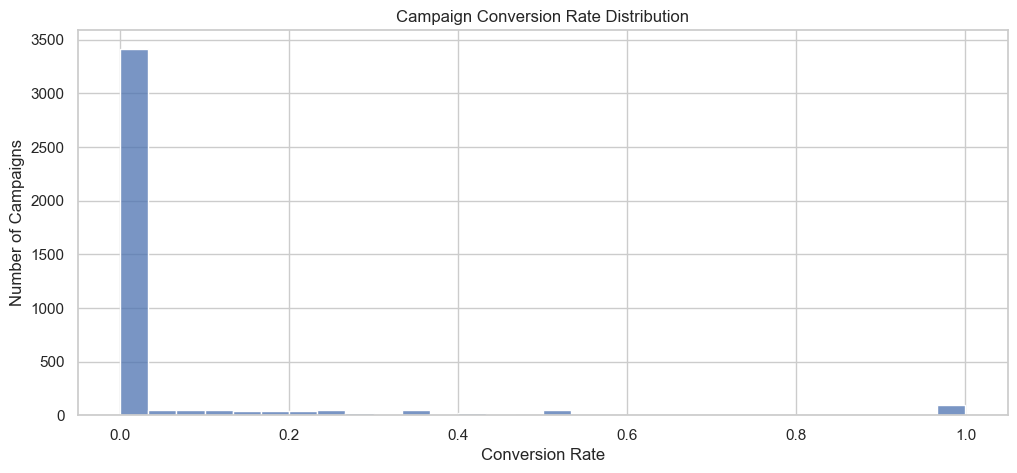

In [23]:
# 6. Campaign Conversion Rate
# Only considering QUALIFIED and DONE_DEAL

qualified_leads = campaign_leads[campaign_leads['lead_status'].isin(['QUALIFIED', 'DONE_DEAL'])]
conversion_per_campaign = qualified_leads.groupby('campaign_id').size() / leads_per_campaign
conversion_per_campaign = conversion_per_campaign.fillna(0)

plt.figure(figsize=(12,5))
sns.histplot(conversion_per_campaign, bins=30)
plt.title("Campaign Conversion Rate Distribution")
plt.xlabel("Conversion Rate")
plt.ylabel("Number of Campaigns")
plt.show()


##### * Insight : Most campaigns have very low conversion rates. A few campaigns are highly effective. Stakeholders may want to investigate what drives success in these campaigns.

In [24]:
# Analyze relationships between datasets
print("="*50)
print("DATA RELATIONSHIP ANALYSIS")
print("="*50)

# 1. Campaign leads vs campaigns
campaigns_in_leads = campaign_leads['campaign_id'].nunique()
campaigns_in_metadata = campaigns['id'].nunique()
print(f"Unique campaigns in leads data: {campaigns_in_leads}")
print(f"Unique campaigns in metadata: {campaigns_in_metadata}")

# 2. Leads with insights data (via campaign_id)
leads_with_campaign = campaign_leads['campaign_id'].isin(campaigns['id']).sum()
print(f"\nLeads with corresponding campaign metadata: {leads_with_campaign}/{len(campaign_leads)} ({leads_with_campaign/len(campaign_leads)*100:.1f}%)")

# 3. Campaigns with performance insights
campaigns_with_insights = campaigns['id'].isin(insights['campaign_id']).sum()
print(f"Campaigns with performance insights: {campaigns_with_insights}/{len(campaigns)} ({campaigns_with_insights/len(campaigns)*100:.1f}%)")

# 4. Lead progression analysis
leads_with_status = campaign_leads['id'].isin(lead_status_changes['lead_id']).sum()
print(f"\nLeads with status progression tracking: {leads_with_status}/{len(campaign_leads)} ({leads_with_status/len(campaign_leads)*100:.1f}%)")

# 5. Typical status progression paths
print("\nMost common status sequences:")
lead_status_summary = lead_status_changes.groupby('lead_id')['status'].agg(list).reset_index()
common_sequences = lead_status_summary['status'].apply(tuple).value_counts().head(10)
for seq, count in common_sequences.items():
    print(f"  {seq}: {count} leads")

DATA RELATIONSHIP ANALYSIS
Unique campaigns in leads data: 4022
Unique campaigns in metadata: 7364

Leads with corresponding campaign metadata: 56965/56965 (100.0%)
Campaigns with performance insights: 6821/7364 (92.6%)

Leads with status progression tracking: 26279/56965 (46.1%)

Most common status sequences:
  ('NEW_LEAD',): 14521 leads
  ('NEW_LEAD', 'NO_ANSWER'): 2828 leads
  ('NEW_LEAD', 'QUALIFIED'): 2524 leads
  ('NEW_LEAD', 'NOT_QUALIFIED'): 1335 leads
  ('NEW_LEAD', 'CALL_AGAIN'): 890 leads
  ('NEW_LEAD', 'FOLLOW_UP'): 833 leads
  ('NEW_LEAD', 'WHATSAPP'): 803 leads
  ('NEW_LEAD', 'LOW_BUDGET'): 479 leads
  ('NEW_LEAD', 'SWITCHED_OFF'): 421 leads
  ('NEW_LEAD', 'WRONG_NUMBER'): 281 leads



## >> EDA Insights (exploration)


###### ~ after making anaysis for the datasets after cleaned, found these insighths : 


##### * Insight : Most leads are UNKNOWN or NEW_LEAD. Only a small fraction are QUALIFIED or DONE_DEAL. This indicates that filtering by lead_status may be important when calculating campaign performance.


##### * Insight : Some projects have many campaigns (e.g., “Mountain View iCity”), while many projects have only 1 campaign. This might affect aggregated performance metrics if analyzed at project level.


##### * Insight : Campaign metrics are heavily right-skewed. A few campaigns account for very high spend, clicks, or impressions. This suggests outliers should be considered when analyzing performance.


##### * Insight : There is a general positive trend between spend and clicks, but some campaigns have high spend but very few clicks, which may indicate inefficiency.


##### * Insight : Lead volume varies over time, with spikes on certain dates. This temporal analysis could help in campaign planning and trend detection


##### * Insight : Most campaigns have very low conversion rates. A few campaigns are highly effective. Stakeholders may want to investigate what drives success in these campaigns.




> so let's ask the stakhilders the questions

## After Finishing all parts, now i need to ask stakeholders about some details..

### Key Questions for Stakeholders:

1. **Data Consistency Questions:**
   - The campaigns dataset shows campaign IDs starting from 4869, but campaign_leads starts with campaign_id 6493. Should we consider campaigns before 6493, or were these test campaigns?
   - We found 30,686 leads without any status changes in lead_status_changes. Is this expected behavior (e.g., new leads not yet processed), or should all leads have at least one status entry?



2. **Business Logic Questions:**
   - In campaign_leads, the most common status is "UNKNOWN" (27,582 records). What does this status represent, and how should we handle these leads in analysis?
   - The daily_budget in campaigns is mostly 1200, but ranges up to 100,000. Are these extreme values valid, or could they be data entry errors?
   - Phone numbers show different formatting patterns (international, national). What validation rules should we apply?


3. **Temporal Analysis Questions:**
   - Campaign dates range from June 2024 to October 2025, but we're currently in 2024. Are future-dated campaigns planned campaigns, or is this a data quality issue?
   - insights data extends to October 2025 - is this projected/forecasted data?


4. **Data Relationship Questions:**
   - Are all ad_set_id values in insights expected to have corresponding entries in other tables, or can they exist independently?
   - What's the business significance of leads appearing in campaign_leads but not having progression tracked in lead_status_changes?
